# Logistic Regression Showcase

In this `.ipynb` file, we use a dataset from `Kaggle.com` to demostrate how to use `Logistic Regression` to classify it... <br>
And visualize its **Decision Boundary** and **Confusion Matrix**.

In [1]:
# Importing Libs

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import the dataset

dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Splitting Dataset:

Then we need to split our dataset in dependent and independent variables.

We'll consider **Age** and **EstimatedSalary** as independent vars used in the classification, and **Purchased** as the dependent var.

In [3]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

The next thing to do is to further split our dataset into **Training Data** and **Test Data**.

The **Training Data** is used for training our model (finding the optimal parameters), and we will use our `Logistic Model` and **Test Data** to validate it.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

The next thing to do is to scale our data from their original value into an interval between $0$ and $1$. It helps reduce the impact caused by the extreme values in our dataset.

In [5]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()                 # create an instance of StandardScaler
X_train = sc_X.fit_transform(X_train)   # fit and transform X_train and X_test
X_test = sc_X.transform(X_test)

## Fitting Logistic Regression to the Training Set

Now, we are going to construct our **Logistic Classifier**.

In [6]:
from sklearn.linear_model import LogisticRegression     # import the classifier from sklearn package


# set random_state=0 to ensure the result never changes
classifier = LogisticRegression(random_state=0)         # create an instance of the classifier object

classifier.fit(X_train, y_train)                        # then use this classifier to fit X_train and y_train

LogisticRegression(random_state=0)

## Predicting the Test Set results

the code snippet above trained an **Logistic Classifier** which can predict whether a person will purchase a car or not based on that person's **Age** and **EstimatedSalary**.

Now, we are going to use this classifier to make predictions for the **Test DataSet** and visualize the accuracy rate using **Confusion Matrix**.

In [7]:
y_pred = classifier.predict(X_test)     # make predictions


In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)   # compute the confusion matrix

`Confusion Matrix` is a specific table layout that allows visualization of the performance of an algorithm. 

In the confusion matrix, the two elements in the first row represents the number of `"TP" (True Positive)`, `"FP" (False Positive)`; 

the two in the second row represents `"FN" (False Negative)`, `"TN" (True Negative)` respectively. 

Therefore the accuracy is: 

$$\frac{TP + TN}{\text{Total test datapoints}}$$

In [9]:
# print out the confusion matrix
print("The confusion matrix is: "+ str(cm))

# calculate and print out the accuracy rate
print("The accuracy is: " + str((cm[0][0] + cm[1][1])/len(y_pred)))

The confusion matrix is: [[65  3]
 [ 8 24]]
The accuracy is: 0.89


## Visualisation

Finally we will visualize our Test/Training Set's result. We first visualize the confusion matrix:


<AxesSubplot:>

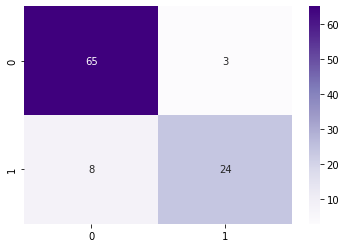

In [10]:
import seaborn as sn

sn.heatmap(cm, annot=True, cmap='Purples')

Then we are going to visualize the `Decision Boundary` of our model in `Training Set` and `Test Set`.

`Decision Boundary` is a hypersurface that partitions the vector space into two sets, one for each class.

The classifier will classify all the datapoints on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


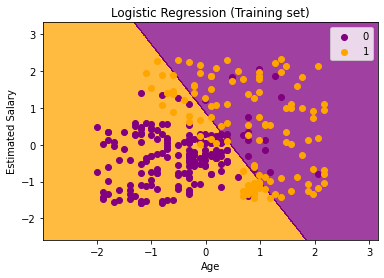

In [11]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1,   step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'purple')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('purple', 'orange'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


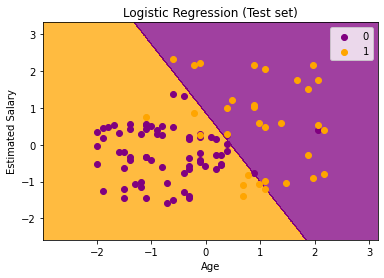

In [12]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'purple')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('purple', 'orange'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Reference:

https://www.marktechpost.com/2021/02/12/logistic-regression-with-a-real-world-example-in-python/

https://www.kaggle.com/akram24/social-network-ads

https://blog.csdn.net/transformed/article/details/102816635

int max;
int min;
int dist = (max - min);

for (int data : datum) {
    int new_data = data / dist;
}